In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# MAE MSE

In [4]:
mist_mae = []
mist_mse = []

for comm in range(1, 78):

    # with open(mist_path + str(comm) + "_7.txt", "r") as f:
    with open("mist_actual_metrics_v2/" + str(comm) + ".txt", "r") as f:
        lines = f.readlines()
        lines = lines[0].split(" ")
        mist_mae.append(float(lines[0]))
        mist_mse.append(float(lines[1]))

mist_mae = np.array(mist_mae)
mist_mse = np.array(mist_mse)

print(len(mist_mae))
print(len(mist_mse))

77
77


In [5]:
# save the mae and mse of mist
with open("mist_actual_mae_v2.pkl", "wb") as f:
    pickle.dump(mist_mae, f)
    
with open("mist_actual_mse_v2.pkl", "wb") as f:
    pickle.dump(mist_mse, f)

# Analysis

In [2]:
mist_mae = pickle.load(open("mist_actual_mae_v2.pkl", "rb"))
mist_mse = pickle.load(open("mist_actual_mse_v2.pkl", "rb"))

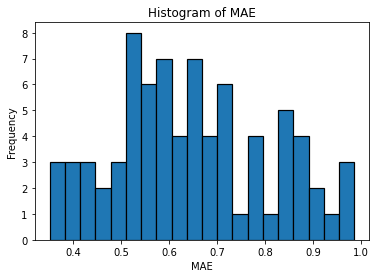

In [3]:
with open("Analysis mist_MAE.txt", "w") as f:
    f.write("Min: " + str(np.min(mist_mae)) + "\n")
    f.write("Max: " + str(np.max(mist_mae)) + "\n")
    f.write("Mean: " + str(np.mean(mist_mae)) + "\n")
    f.write("Variance: " + str(np.var(mist_mae)) + "\n")

# plot histogram
plt.hist(mist_mae, bins=20, edgecolor="black", linewidth=1.2)
plt.title("Histogram of MAE")
plt.xlabel("MAE")
plt.ylabel("Frequency")
plt.savefig("Mist MAE Histogram.jpg", bbox_inches="tight")
plt.show()

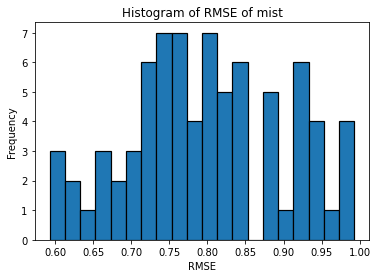

In [4]:
with open("Analysis mist_RMSE.txt", "w") as f:
    f.write("Min: " + str(np.min(mist_mse**0.5)) + "\n")
    f.write("Max: " + str(np.max(mist_mse**0.5)) + "\n")
    f.write("Mean: " + str(np.mean(mist_mse**0.5)) + "\n")
    f.write("Variance: " + str(np.var(mist_mse**0.5)) + "\n")

# plot histogram of mse
plt.hist(mist_mse**0.5, bins=20, edgecolor='black', linewidth=1.2)
plt.title("Histogram of RMSE of mist")
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.savefig("RMSE Hisogram of mist.jpg", bbox_inches='tight')
plt.show()

# F1 Scores

In [11]:
y_true_path = "trues_after_threshold_1d_run3.pkl"
y_pred_path = "preds_after_threshold_1d_run3.pkl"

y_true = pickle.load(open(y_true_path, "rb"))
y_pred = pickle.load(open(y_pred_path, "rb"))

y_true.shape, y_pred.shape

((3850, 4), (3850, 4))

In [12]:
y_true = y_true.reshape(-1, 77, 4)
y_pred = y_pred.reshape(-1, 77, 4)

y_true.shape, y_pred.shape

((50, 77, 4), (50, 77, 4))

In [13]:
# print accuracy
print("Accuracy: ", accuracy_score(y_true.reshape(-1, 1), y_pred.reshape(-1, 1)))

Accuracy:  0.5487012987012987


In [14]:
for i in range(77):
    true = y_true[:, i, :]
    pred = y_pred[:, i, :]
    macro = f1_score(true, pred, average="macro")
    micro = f1_score(true, pred, average="micro")

    # save in a text file
    with open("f1_scores/" + str(i) + ".txt", "w") as f:
        f.write(str(macro))
        f.write(" ")
        f.write(str(micro))
        f.close()

    print("Community: ", i, " Macro: ", macro, " Micro: ", micro)

Community:  0  Macro:  0.7380763598033637  Micro:  0.787878787878788
Community:  1  Macro:  0.7382309941520467  Micro:  0.7753846153846154
Community:  2  Macro:  0.679937156545731  Micro:  0.7538940809968847
Community:  3  Macro:  0.5578082662075082  Micro:  0.6164874551971326
Community:  4  Macro:  0.42589118198874293  Micro:  0.5
Community:  5  Macro:  0.7214405072109131  Micro:  0.7870967741935483
Community:  6  Macro:  0.6759970415884394  Micro:  0.7905405405405406
Community:  7  Macro:  0.7893708922426468  Micro:  0.8338192419825073
Community:  8  Macro:  0.15006096778333977  Micro:  0.1829268292682927
Community:  9  Macro:  0.4503449938232547  Micro:  0.50199203187251
Community:  10  Macro:  0.3752907942838152  Micro:  0.4444444444444445
Community:  11  Macro:  0.17325428194993414  Micro:  0.19883040935672516
Community:  12  Macro:  0.30335576259489305  Micro:  0.33476394849785407
Community:  13  Macro:  0.6054150527834739  Micro:  0.6394557823129251
Community:  14  Macro:  0.660

In [5]:
deepcrime_macro = []
deepcrime_micro = []

for comm in range(0, 77):

    # with open(deepcrime_path + str(comm) + "_7.txt", "r") as f:
    with open("f1_scores/" + str(comm) + ".txt", "r") as f:
        lines = f.readlines()
        lines = lines[0].split(" ")
        deepcrime_macro.append(float(lines[0]))
        deepcrime_micro.append(float(lines[1]))

deepcrime_macro = np.array(deepcrime_macro)
deepcrime_micro = np.array(deepcrime_micro)

print(len(deepcrime_macro))
print(len(deepcrime_micro))

# save the mae and mse of deepcrime
with open("dc_actual_macro_1d_default_aist_cats_run3.pkl", "wb") as f:
    pickle.dump(deepcrime_macro, f)
    
with open("dc_actual_micro_1d_default_aist_cats_run3.pkl", "wb") as f:
    pickle.dump(deepcrime_micro, f)

77
77
